In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import math

## ML Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression

## Plotting Libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from nltk import download
from nltk.corpus import stopwords
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rsilveira79/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!ls

1.baseline.ipynb	     sample_submission.csv  train.tsv
regression_baseline_1.ipynb  test.tsv


### **"Objective"** --> predict sales price of an item  

In [3]:
submit = pd.read_csv('sample_submission.csv')

In [4]:
submit.tail()

,test_id,price
693354,693354,26.738
693355,693355,26.738
693356,693356,26.738
693357,693357,26.738
693358,693358,26.738


In [5]:
train = pd.read_csv('train.tsv', sep='\t').reset_index(drop=True)
print(len(train))
train.tail()

1482535


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...
1482534,1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,NaN,22.0,0,"New with tag, red with sparkle. Firm price, no..."


## Description
- **item_condition_id** - the condition of the items provided by the seller
- **category_name** - category of the listing
- **shipping** - 1 if shipping fee is paid by seller and 0 by buyer

In [6]:
train = train.where((pd.notnull(train)), None)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,None,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,None,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,None,44.0,0,Complete with certificate of authenticity


In [7]:
for i in range(0,10):
    print(i, train.loc[i].item_description)

0 No description yet
1 This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2 Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!
3 New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4 Complete with certificate of authenticity
5 Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.
6 Size small but straps slightly shortened to fit xs, besides that, perfect condition
7 You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and you can take him today for less than the price of one

In [8]:
for i in range(0,10):
    print(i, train.loc[i].brand_name)

0 None
1 Razer
2 Target
3 None
4 None
5 None
6 Acacia Swimwear
7 Soffe
8 Nike
9 None


## Check most expensive brands

In [9]:
most_expensive_brands = list(set(train.brand_name[train.price >1500]))
print(len(most_expensive_brands))
most_expensive_brands[0:10]

10


['Michael Kors',
 'David Yurman',
 'Apple',
 'Saint Laurent',
 'Mary Kay',
 'Celine',
 'Chanel',
 'Urban Decay',
 None,
 'Louis Vuitton']

## Which products are above 1500 price

In [10]:
train[train.price > 1500][0:15]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1971,1971,Chanel Classic Flag Bag medium Caviar L,3,Women/Women's Handbags/Shoulder Bag,Chanel,1506.0,0,No description yet
145696,145696,Louis Vuitton Monogram Metis Bag,2,Women/Women's Handbags/Shoulder Bag,Louis Vuitton,1759.0,0,32 L x 36 H x 14 W cm Features: Open top; One ...
164527,164527,MONOGRAM SAINT LAURENT WALLET MATELASSÉ,1,Women/Women's Handbags/Shoulder Bag,Saint Laurent,1525.0,1,"$ 1,550.00 RETAIL MONOGRAM SAINT LAURENT CHAIN..."
180749,180749,NEW apple products,1,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,1909.0,0,"bundle includes: ipad pro keyboard, iphone 6S ..."
182847,182847,Auth. chanel boy maxi lambskin France,3,Women/Women's Handbags/Shoulder Bag,Chanel,1850.0,1,Elegant authentic chanel boy bag made in Franc...
194639,194639,iPad Pro,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,Apple,1900.0,1,"Great condition iPad Pro, biggest size with lo..."
229506,229506,Elegant authentic Chanel boy bag France,2,Women/Women's Handbags/Shoulder Bag,Chanel,1625.0,1,Ob hold. ...Beautiful and elegant authentic Ch...
244054,244054,LV Bag,2,Women/Women's Handbags/Shoulder Bag,Louis Vuitton,1815.0,0,9/10 condition like new
279398,279398,Louis Vuitton Kensington Damier Ebene,2,Vintage & Collectibles/Bags and Purses/Handbag,Louis Vuitton,1600.0,1,Brand new Bag 100% authentic Perfect condition...
339886,339886,Chanel Le Boy,3,Women/Women's Handbags/Shoulder Bag,Chanel,1609.0,0,Large. Authentic. Comes with dustbag and authe...


In [11]:
ultra_cheap_brands = list(set(train.brand_name[train.price <1]))
print(len(ultra_cheap_brands))
ultra_cheap_brands[0:10]

237


['PINK',
 'Cartier',
 'Givenchy',
 'Love Culture',
 'Costa Del Mar',
 'Steve Madden',
 'Miley Cyrus',
 'Bushnell',
 'The North Face',
 "Carter's"]

## Data Cleaning -- which products are below 1 price - dropping 0 price products

In [12]:
print(len(train))
print(len(train[train.price == 0]))

1482535
874


In [13]:
train = train[train.price != 0].reset_index(drop=True)

In [14]:
print(len(train))
print(len(train[train.price == 0]))

1481661
0


In [15]:
train["brand_name"] = train["brand_name"].fillna("unknown")
train["category_name"] = train["category_name"].fillna("unknown")

## Count number of Brands 

In [16]:
total_number_brands = print(len(set(train.brand_name)))

4808


In [17]:
brand_counter = Counter(list(train.brand_name))

In [18]:
brand_counter.most_common(n=10)

[('unknown', 632336),
 ('PINK', 54072),
 ('Nike', 54006),
 ("Victoria's Secret", 48011),
 ('LuLaRoe', 30995),
 ('Apple', 17314),
 ('FOREVER 21', 15178),
 ('Nintendo', 14998),
 ('Lululemon', 14550),
 ('Michael Kors', 13916)]

### Feature #1 - Brand name encoded

In [19]:
train["brand_name_encoded"] = ""
label_enc_brand = LabelEncoder()
train.brand_name_encoded = label_enc_brand.fit_transform(train["brand_name"].astype(str))
train.loc[0:5]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,4805
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3555
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,4178
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,4805
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,4805
5,5,Bundled items requested for Ruie,3,Women/Other/Other,unknown,59.0,0,"Banana republic bottoms, Candies skirt with ma...",4805


### Feature #2 - Category name encoded

In [20]:
train["category_name_encoded"] = ""
label_enc_categories = LabelEncoder()
train.category_name_encoded = label_enc_categories.fit_transform(train["category_name"].astype(str))
train.loc[0:5]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,4805,808
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3555,86
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,4178,1254
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,4805,485
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,4805,1181
5,5,Bundled items requested for Ruie,3,Women/Other/Other,unknown,59.0,0,"Banana republic bottoms, Candies skirt with ma...",4805,1193


In [21]:
cat_counter = Counter(list(train.category_name))
cat_counter.most_common(n=10)
cat_counter['Beauty/Makeup/Face']

34320

### Feature #3 - Most expensive price (Brand)

In [22]:
train["most_expensive_brand"] = ""
list_brands = list(set(train.brand_name))
list_brands_avg_price = []

In [23]:
for brand in list_brands:
    avg_price = train.price[train.brand_name == brand].mean()
    list_brands_avg_price.append(avg_price)
prices_avg = list(zip(list_brands, list_brands_avg_price))
prices_avg[0:10]

[('Pull&Bear', 11.0),
 ('Oxford Golf', 16.0),
 ('Tampax', 19.081632653061224),
 ('Knightsbridge', 16.0),
 ('Groovy Toys', 16.11111111111111),
 ('Quicksilver', 14.4375),
 ('Blue Asphalt', 13.875),
 ('XCVI', 19.5),
 ('Arizona', 13.48),
 ('Bagatelle', 16.5)]

In [24]:
## 10 most expensive brands (AVG)
most_exp_avg = sorted(prices_avg, key=lambda x: x[1], reverse = True)[0:20]
print("Most exp brands: {}".format(most_exp_avg))
## 10 least expensive brands (AVG)
least_exp_avg = sorted(prices_avg, key=lambda x: x[1], reverse = False)[0:20]
print("Least exp brands: {}".format(least_exp_avg))

Most exp brands: [('Demdaco', 429.0), ('Proenza Schouler', 413.25), ('Auto Meter', 344.0), ('Oris', 300.0), ('MCM Worldwide', 289.17391304347825), ('Longines', 254.0), ('Vitamix', 253.11111111111111), ('Blendtec', 251.8), ('David Yurman', 248.61157024793388), ('Celine', 238.78082191780823), ('Saint Laurent', 232.578125), ('Canada Goose', 230.25), ('Dainese', 230.0), ('Valentino Garavani', 227.0), ('Frédérique Constant', 224.0), ('Mackage', 221.0), ('MICHELE', 216.98305084745763), ('Tag Heuer', 206.125), ('Alexander Wang', 205.7027027027027), ('iRobot', 204.5)]
Least exp brands: [('Play MG', 3.0), ('Peanut Shell', 3.0), ('Feetures!', 3.0), ('Pedialyte', 3.0), ('Genica', 3.0), ('Archie Comics', 3.0), ('Old Glory', 3.0), ('Kae Argatherapie', 3.0), ('A.B.S. by Allen Schwartz', 3.0), ('Twilight Gypsy Collective', 3.0), ('Revlon Colorsilk', 3.0), ('Kids Only', 3.0), ('Ask', 3.0), ('Ergodyne', 3.0), ('DUO', 3.0), ('Scunci', 3.0), ('AA Aquarium', 3.0), ('Workman', 3.5), ('Babyhome', 4.0), ('He

In [25]:
company, price = zip(*most_exp_avg)
train['most_expensive_brand']=train['brand_name'].apply(lambda x: 1 if x in list(company) else 0)
print(len(train[train['most_expensive_brand']==1]))
train[train['most_expensive_brand']==1][0:10]

668


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,most_expensive_brand
2567,2569,Phantom Trapeze Handbag,2,Women/Women's Handbags/Totes & Shoppers,Celine,70.0,0,NWOT; black vegan leather Phantom Trapeze larg...,880,1286,1
2687,2689,David Yurman cable classics bracelet,3,Women/Jewelry/Bracelets,David Yurman,200.0,1,David Yurman cable classics bracelet with pear...,1197,1179,1
4570,4575,MCM fits waist 36-40,1,Men/Men's Accessories/Belts,MCM Worldwide,44.0,0,Great belt,2654,744,1
6056,6062,YSL booties,3,Women/Shoes/Boots,Saint Laurent,135.0,0,Beautiful burgundy and black booties. Super co...,3751,1204,1
7171,7179,Authentic David Yurman bracelet,2,Women/Jewelry/Bracelets,David Yurman,225.0,1,Cable classic bracelet with turquoise and 14k ...,1197,1179,1
9373,9382,David Yurman Albion Diamond Blue Topaz,3,Women/Jewelry/Rings,David Yurman,304.0,0,Comes in pouch. Ring is size 5.75. It has .22t...,1197,1182,1
14027,14038,Michele Watch,3,Women/Women's Accessories/Watches,MICHELE,154.0,0,"Michele watch, good condition. A few scratches...",2659,1277,1
15063,15074,MCM reversible liz tote,2,Women/Women's Handbags/Totes & Shoppers,MCM Worldwide,340.0,1,"Very lightly used almost new.100% authentic, M...",2654,1286,1
15758,15769,Celine Tri Colored Suede Mini luggage,3,Women/Women's Handbags/Totes & Shoppers,Celine,1009.0,0,Beautiful Celine mini luggage. In good conditi...,880,1286,1
16562,16573,Michele Deco II Band,1,Women/Women's Accessories/Watches,MICHELE,89.0,0,Michele Deco II band. Never used. Paid [rm] for.,2659,1277,1


In [26]:
train['least_expensive_brand']=""
company, price = zip(*least_exp_avg)
train['least_expensive_brand']=train['brand_name'].apply(lambda x: 1 if x in list(company) else 0)
print(len(train[train['least_expensive_brand']==1]))
train[train['least_expensive_brand']==1][0:10]

21


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,most_expensive_brand,least_expensive_brand
83235,83291,RSVD@ALEXIS Duo WHITE clear strip glue,1,Beauty/Makeup/Eyes,DUO,3.0,1,√RESERVED@ALEXIS purchase Only. ########## PLE...,1166,26,0,1
128217,128293,Color Silk 54 Light Golden Brown,2,Women/Women's Accessories/Hair Accessories,Revlon Colorsilk,3.0,1,Never used! Comes with conditioner.,3618,1271,0,1
222222,222339,Feetures running socks,3,Women/Athletic Apparel/Socks,Feetures!,3.0,1,No description yet,1546,1142,0,1
236059,236182,5 pedialyte coupons,1,Other/Daily & Travel items/Baby & Child Care,Pedialyte,3.0,1,5 3 off 2 pedialyte coupons,3291,841,0,1
284296,284435,Brain Quest for ages 3-4,2,Kids/Toys/Learning & Education,Workman,4.0,1,Brain quest for ages 3-4 4th edition deck 1 an...,4632,693,0,1
307345,307491,Brain quest 300 questions Freeship,3,Kids/Toys/Learning & Education,Workman,3.0,1,No box,4632,693,0,1
420431,420633,Bravest Warriors Comic,2,Other/Books/Literature & Fiction,Archie Comics,3.0,1,The bravest warriors comic only [rm],282,834,0,1
470376,470616,Fish tank filters,1,Other/Pet Supplies/Others,AA Aquarium,3.0,1,Never opened or used fish tank filters,36,882,0,1
520317,520594,Bon bebe,1,Kids/Bathing & Skin Care/Washcloths & Towels,Babyhome,4.0,1,Brand New 12 washcloths 0 + years,424,554,0,1
596492,596805,Red luxury men's Watch,1,Electronics/Cell Phones & Accessories/Cell Pho...,Genica,3.0,1,New* 100% working Red luxury watch Fast shipping,1718,80,0,1


## Split Categories

In [27]:
def split_cat(text):
    try:
        cats = text.split("/")
        return cats[0], cats[1], cats[2], cats[0] + '/' + cats[1]
    except:
        #print("no category")
        return 'other', 'other', 'other', 'other/other'

In [28]:
train.loc[0]

train_id                                                   0
name                     MLB Cincinnati Reds T Shirt Size XL
item_condition_id                                          3
category_name                              Men/Tops/T-shirts
brand_name                                           unknown
price                                                     10
shipping                                                   1
item_description                          No description yet
brand_name_encoded                                      4805
category_name_encoded                                    808
most_expensive_brand                                       0
least_expensive_brand                                      0
Name: 0, dtype: object

In [29]:
train['general_cat'], train['subcat_1'], train['subcat_2'], train['gen_subcat1'] = \
        zip(*train['category_name'].apply(lambda x: split_cat(x)))

In [31]:
train.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,most_expensive_brand,least_expensive_brand,general_cat,subcat_1,subcat_2,gen_subcat1,subcat_1_enc,subcat_2_enc,subcat_3_enc
1481656,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",1640,1165,0,0,Women,Dresses,Mid-Calf,Women/Dresses,35,513,
1481657,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,1264,633,0,0,Kids,Girls 2T-5T,Dresses,Kids/Girls 2T-5T,47,275,
1481658,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,unknown,12.0,0,"Used once or twice, still in great shape.",4805,894,0,0,Sports & Outdoors,Exercise,Fitness accessories,Sports & Outdoors/Exercise,37,319,
1481659,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,4805,485,0,0,Home,Home Décor,Home Décor Accents,Home/Home Décor,55,404,
1481660,1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,unknown,22.0,0,"New with tag, red with sparkle. Firm price, no...",4805,1276,0,0,Women,Women's Accessories,Wallets,Women/Women's Accessories,110,844,


In [32]:
train["subcat_1_enc"] = ""
train["subcat_2_enc"] = ""
train["subcat_3_enc"] = ""
label_enc_sub_1 = LabelEncoder()
label_enc_sub_2 = LabelEncoder()
label_enc_sub_3 = LabelEncoder()
train.subcat_1_enc = label_enc_sub_1.fit_transform(train["general_cat"].astype(str))
train.subcat_2_enc = label_enc_sub_2.fit_transform(train["subcat_1"].astype(str))
train.subcat_3_enc = label_enc_sub_3.fit_transform(train["subcat_2"].astype(str))
train.loc[0:5]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,most_expensive_brand,least_expensive_brand,general_cat,subcat_1,subcat_2,gen_subcat1,subcat_1_enc,subcat_2_enc,subcat_3_enc
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,4805,808,0,0,Men,Tops,T-shirts,Men/Tops,5,102,762
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3555,86,0,0,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets,1,30,212
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,4178,1254,0,0,Women,Tops & Blouses,Blouse,Women/Tops & Blouses,9,103,94
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,4805,485,0,0,Home,Home Décor,Home Décor Accents,Home/Home Décor,3,55,404
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,4805,1181,0,0,Women,Jewelry,Necklaces,Women/Jewelry,9,58,536
5,5,Bundled items requested for Ruie,3,Women/Other/Other,unknown,59.0,0,"Banana republic bottoms, Candies skirt with ma...",4805,1193,0,0,Women,Other,Other,Women/Other,9,72,558


### NLP Features

In [33]:
import gensim
from string import punctuation
import re
import unicodedata

In [34]:
def remove_latin_character(text):
    text = unicodedata.normalize('NFKD',text).encode('ASCII','ignore').decode("utf-8") # remove latin utf-8 characters
    return text

In [35]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [36]:
def remove_link(text):
    text = text.split()
    links = []
    for item in text:
        try:
            result = re.search('http(.*)', item)
            name = result.group(1)
            links.append(item)
        except:
            pass
    text_filtered = [x for x in text if x not in links]
    text_filtered = " ".join(text_filtered)
    return text_filtered, links

In [37]:
text = 'All items total retail for [rm] in store and you can take hi'

In [38]:
def remove_rm(text):
    text = text.split()
    text_filtered = [x for x in text if x != "[rm]"]
    text_filtered = " ".join(text_filtered)
    return text_filtered

In [39]:
remove_rm(text)

'All items total retail for in store and you can take hi'

In [40]:
def preprocess(text, do_stop = True):
    # Replace punctuation with tokens so we can use them in our model
    text = text.lower()
    text = text.replace('\n', ' ')
    
    # Remove links 
    text, _ = remove_link(text)

    # Remove punctuation
    text = strip_punctuation(text)
    
    # Remove latin character
    
    text = remove_latin_character(text)
    
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Remove "RM" string
    text = remove_rm(text)
    
    #text = re.sub(r'[^\w\s]','',text) # strip punctuation
    # Convert text to lower
    text = text.lower()
    
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Remove Stopwords
    stops = set(stopwords.words("english"))
    # Removing all the stopwords
    if (do_stop==True):
        filtered_words = [word for word in text.split() if word not in stops]
    else:
        filtered_words = [word for word in text.split()]
    
    text = ' '.join(text.split()) ## replacing extra spaces
    text = text.replace(".","")
    return text

In [41]:
train['item_description_clean'] = ""
train['item_description_clean'] = train['item_description'].apply(lambda x: preprocess(str(x)))
train['name_clean'] = ""
train['name_clean'] = train['name'].apply(lambda x: preprocess(str(x)))
train.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,...,least_expensive_brand,general_cat,subcat_1,subcat_2,gen_subcat1,subcat_1_enc,subcat_2_enc,subcat_3_enc,item_description_clean,name_clean
1481656,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",1640,1165,...,0,Women,Dresses,Mid-Calf,Women/Dresses,9,35,513,lace says size small but fits medium perfectly...,free people inspired dress
1481657,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,1264,633,...,0,Kids,Girls 2T-5T,Dresses,Kids/Girls 2T-5T,4,47,275,little mermaid handmade dress never worn size 2t,little mermaid handmade dress
1481658,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,unknown,12.0,0,"Used once or twice, still in great shape.",4805,894,...,0,Sports & Outdoors,Exercise,Fitness accessories,Sports & Outdoors/Exercise,7,37,319,used once or twice still in great shape,21 day fix containers and eating plan
1481659,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,4805,485,...,0,Home,Home Décor,Home Décor Accents,Home/Home Décor,3,55,404,there is 2 of each one that you see so 2 red 2...,world markets lanterns
1481660,1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,unknown,22.0,0,"New with tag, red with sparkle. Firm price, no...",4805,1276,...,0,Women,Women's Accessories,Wallets,Women/Women's Accessories,9,110,844,new with tag red with sparkle firm price no fr...,brand new lux de ville wallet


## Binarize label item_condition

In [42]:
print(train.shape)
list(set(train['item_condition_id']))

(1481661, 21)


[1, 2, 3, 4, 5]

In [43]:
from sklearn.preprocessing import label_binarize

In [44]:
new_condition_ids = label_binarize(train['item_condition_id'], classes = list(set(train['item_condition_id'])))
#print(type(new_condition_ids))
new_condition_ids.shape

(1481661, 5)

In [45]:
for i in range(10,20):
    print(train['item_condition_id'][i])
    print(new_condition_ids[i])

2
[0 1 0 0 0]
1
[1 0 0 0 0]
2
[0 1 0 0 0]
1
[1 0 0 0 0]
3
[0 0 1 0 0]
1
[1 0 0 0 0]
1
[1 0 0 0 0]
1
[1 0 0 0 0]
1
[1 0 0 0 0]
2
[0 1 0 0 0]


In [46]:
condition_ids = pd.DataFrame(new_condition_ids, columns = ['item_condition_id_1',
                                                           'item_condition_id_2',
                                                           'item_condition_id_3',
                                                           'item_condition_id_4',
                                                           'item_condition_id_5'])

In [47]:
print(condition_ids.shape)
print(train.shape)

(1481661, 5)
(1481661, 21)


In [48]:
train = pd.concat([train, condition_ids], axis = 1).reset_index(drop=True)

In [49]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,...,subcat_1_enc,subcat_2_enc,subcat_3_enc,item_description_clean,name_clean,item_condition_id_1,item_condition_id_2,item_condition_id_3,item_condition_id_4,item_condition_id_5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,4805,808,...,5,102,762,no description yet,mlb cincinnati reds t shirt size xl,0,0,1,0,0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3555,86,...,1,30,212,this keyboard is in great condition and works ...,razer blackwidow chroma keyboard,0,0,1,0,0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,4178,1254,...,9,103,94,adorable top with a hint of lace and a key hol...,avaviv blouse,1,0,0,0,0
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,4805,485,...,3,55,404,new with tags leather horses retail for rm eac...,leather horse statues,1,0,0,0,0
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,4805,1181,...,9,58,536,complete with certificate of authenticity,24k gold plated rose,1,0,0,0,0


2009.0 3.0


/home/rsilveira79/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc60df14080>]],
      dtype=object)

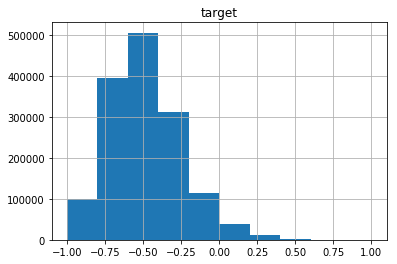

In [50]:
train["target"] = np.log(train.price+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
print(max(train['price']), min(train['price']))
train['target']=target_scaler.fit_transform(train.target.reshape(-1,1))
pd.DataFrame(train.target).hist()

## Encoding Brands with one hot encoding

In [51]:
brands_enc = LabelBinarizer(sparse_output=True)
train_brands = brands_enc.fit_transform(train["brand_name"])

In [52]:
train_brands.toarray().shape

(1481661, 4808)

## Encoding Categories with one hot encoding

In [53]:
cat_enc = LabelBinarizer(sparse_output=True)
train_cats = cat_enc.fit_transform(train["category_name"])

In [54]:
type(train_cats.toarray())

numpy.ndarray

In [55]:
train.memory_usage(deep = True)

Index                            80
train_id                   11853288
name                      123856321
item_condition_id          11853288
category_name             138096447
brand_name                118636203
price                      11853288
shipping                   11853288
item_description          334549182
brand_name_encoded         11853288
category_name_encoded      11853288
most_expensive_brand       11853288
least_expensive_brand      11853288
general_cat               135943371
subcat_1                  173503258
subcat_2                  170267316
gen_subcat1               226473613
subcat_1_enc               11853288
subcat_2_enc               11853288
subcat_3_enc               11853288
item_description_clean    290330617
name_clean                121945998
item_condition_id_1        11853288
item_condition_id_2        11853288
item_condition_id_3        11853288
item_condition_id_4        11853288
item_condition_id_5        11853288
target                     1

In [56]:
import gc
gc.collect()

20

In [57]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,brand_name_encoded,category_name_encoded,...,subcat_2_enc,subcat_3_enc,item_description_clean,name_clean,item_condition_id_1,item_condition_id_2,item_condition_id_3,item_condition_id_4,item_condition_id_5,target
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,4805,808,...,102,762,no description yet,mlb cincinnati reds t shirt size xl,0,0,1,0,0,-0.674705
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3555,86,...,30,212,this keyboard is in great condition and works ...,razer blackwidow chroma keyboard,0,0,1,0,0,-0.169079
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,4178,1254,...,103,94,adorable top with a hint of lace and a key hol...,avaviv blouse,1,0,0,0,0,-0.674705
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,4805,485,...,55,404,new with tags leather horses retail for rm eac...,leather horse statues,1,0,0,0,0,-0.293451
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,4805,1181,...,58,536,complete with certificate of authenticity,24k gold plated rose,1,0,0,0,0,-0.221696


In [58]:
features = list(zip(train['shipping'],
                    train['item_condition_id_1'], train['item_condition_id_2'], train['item_condition_id_3'], train['item_condition_id_4'], train['item_condition_id_5'],
                    train['brand_name_encoded'],
                    train['category_name_encoded'],train['subcat_2_enc'],train['subcat_2_enc'],
                    train['most_expensive_brand'], train['least_expensive_brand']
))

In [64]:
features =np.array(features)
label = np.array(train['price'])

In [70]:
print(features.shape, label.shape)

(1481661, 12) (1481661,)


## w/o NLP Features

In [71]:
x_train, x_valid, y_train, y_valid = train_test_split(features,label, test_size=0.2, random_state=2017)

In [72]:
model = MLPRegressor(activation = 'relu', 
                       max_iter=1000, 
                       hidden_layer_sizes=(800,), 
                       solver='adam')

In [ ]:
model.fit(x_train, y_train)

In [ ]:
x_valid[0:10]

In [ ]:
y_valid[0:10]

In [ ]:
preds = model.predict(x_valid)

In [ ]:
preds = target_scaler.inverse_transform(preds.reshape(-1, 1))
preds =  np.exp(preds)+1

In [ ]:
mean_squared_error(y_valid, preds)

## Ridge Regression

In [ ]:
model_ridge = Ridge(solver='auto', fit_intercept=True, alpha=0.4, max_iter=200, normalize=False, tol=0.01)

In [ ]:
model_ridge.fit(x_train, y_train)

In [ ]:
len(x_valid)

In [ ]:
preds_ridge = model_ridge.predict(x_valid)

In [ ]:
preds = target_scaler.inverse_transform(preds_ridge.reshape(-1, 1))
preds =  np.exp(preds)+1

In [ ]:
len(preds), len(y_valid)

In [ ]:
mean_squared_error(y_valid, preds)

## w/ NLP Features

In [ ]:
print(train.memory_usage(deep = True))

In [ ]:
x_train_description_tfidf = features.fit_transform(train['item_description_clean'])

In [ ]:
features = TfidfVectorizer(max_df=0.9, stop_words=None, lowercase=True)